In [659]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pylab as plb
from scipy.interpolate import UnivariateSpline

In [660]:
def g_tt(r, theta, M, a):
    return -(1-(2*M*r)/(r**2+(a**2*np.cos(theta)**2)))

def g_tphi(r, theta, M, a):
    return -(2*M*a*r*np.sin(theta)**2)/(r**2+(a**2)*np.cos(theta)**2)

def g_phiphi(r, theta, M, a):
    return (r**2+a**2+(2*M*(a**2)*r*np.sin(theta)**2)/(r**2+(a**2)*np.cos(theta)**2))*(np.sin(theta)**2)

def g_thetatheta(r, theta, M, a):
    return r**2+(a**2)*np.cos(theta)**2

def g_rr(r, theta, M, a):
    return (r**2-2*M*r+a**2)/(r**2+(a**2)*np.cos(theta)**2)

def R_H(M, a):
    return M+np.sqrt(M**2-a**2)

def u_t(gtt, gtphi, gphiphi, l):
    return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))

def W(u_t):
    return np.log(np.absolute(u_t))

def r_mb(M, a):
    return 2*M*(1 - a/2. + np.sqrt(1-a))

def r_ms(M, a):
    z1 = 1+((1-a**2)**(1/3))*((1+a)**(1/3)+(1-a)**(1/3))
    z2 = (3*(a**2)+z1**2)**(1/2)
    return M*(3+z2-((3-z1)*(3+z1+2*z2))**(1/2))

def Omega_func(gtt, gtphi, gphiphi, l):
    return -((l*gtt+gtphi)/(l*gtphi+gphiphi))

def l_func(gtt, gtphi, gphiphi, Omega):
    return -((Omega*gphiphi+gtphi)/(Omega*gtphi+gtt))

def u_t_con(u_t, Omega, l):
    return (1/u_t)*(-1/(1-Omega*l))

def l_k(r, M, a):
    return ((M**(1/2))*(r**2-2*a*(M**(1/2))*(r**(1/2))+a**2))/(r**(3/2)-2*M*(r**(1/2))+a*(M**(1/2)))

def K_function(W_in, W_c, gamma, rho_c):
    return rho_c*(W_in - W_c)*((gamma-1)/(gamma))

def rho(W, W_in, gamma, K):
    return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))

In [917]:
a = 0
M = 1
l = l_k(r_mb(M,a),M,a)
l=6
nx=251
ntheta=30
rho_c = 1.
gamma = 4/3.
r_in = r_mb(M, a)
r_in = 10
print(l,r_in)

6 10


In [918]:
x_coord_array = np.linspace(0., 1., nx)
theta_coord_array = np.linspace(0.,np.pi/2, ntheta)
r_H = R_H(M,a)
r_coord_array = np.sqrt(r_H**2+(x_coord_array[1:-1]/(1-x_coord_array[1:-1])**2))
theta_coord_array = theta_coord_array[1:]
r_array = []
theta_array = []
for theta in theta_coord_array:
    r_array.append(r_coord_array)
    theta_array.append(np.ones(nx-2)*theta)
    
r_array = np.asarray(r_array).flatten()
theta_array = np.asarray(theta_array).flatten()
    

In [919]:
gtt_array = g_tt(r_array, theta_array , M, a)
gtphi_array = g_tphi(r_array, theta_array , M, a)
gphiphi_array = g_phiphi(r_array, theta_array , M, a)
u_t_array = u_t(gtt_array, gtphi_array, gphiphi_array, l)
pot_array = W(u_t_array)

/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_4113/1446498858.py:20: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))


In [920]:
gtt_eq_array = g_tt(r_coord_array, np.pi/2, M, a)
gtphi_eq_array = g_tphi(r_coord_array, np.pi/2, M, a)
gphiphi_eq_array = g_phiphi(r_coord_array, np.pi/2, M, a)
u_t_eq_array = u_t(gtt_eq_array, gtphi_eq_array, gphiphi_eq_array, l)
pot_eq_array = W(u_t_eq_array)

/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_4113/1446498858.py:20: RuntimeWarning: invalid value encountered in sqrt
  return -np.sqrt(((gtphi**2-gtt*gphiphi)/(gphiphi+2*l*gtphi+gtt*(l**2))))


In [921]:
rev_pot_eq_array = np.flip(pot_eq_array)
rev_r_coord = np.flip(r_coord_array)
w_ant = 0
for i in np.arange(len(rev_pot_eq_array)):
    w_curr = rev_pot_eq_array[i]
    if w_curr > w_ant:
        W_c = w_ant
        r_c = rev_r_coord[i-1]
        break
    else:
        w_ant = w_curr

print(W_c, r_c)


-0.015505065669345895 30.81091527364934


In [922]:
W_in = W(u_t(g_tt(r_in, np.pi/2, M, a), g_tphi(r_in, np.pi/2,M, a), g_phiphi(r_in, np.pi/2, M, a), l))
if (W_in > 0):
    W_in = 0.
    
K = K_function(W_in, W_c, gamma, rho_c)
print(W_in, W_c)


0.0 -0.015505065669345895


In [923]:
rho_array = rho(pot_array, W_in, gamma, K)
rho_array[np.isnan(rho_array)] = 0
print(rho_array)

[0.         0.         0.         ... 0.24474726 0.0911114  0.01408099]


/var/folders/t4/3w52rh197m5006x9z789nqg80000gn/T/ipykernel_4113/1446498858.py:49: RuntimeWarning: invalid value encountered in power
  return ((np.exp(W_in-W)-1)*((gamma-1)/(gamma*K)))**((1)/(gamma-1))


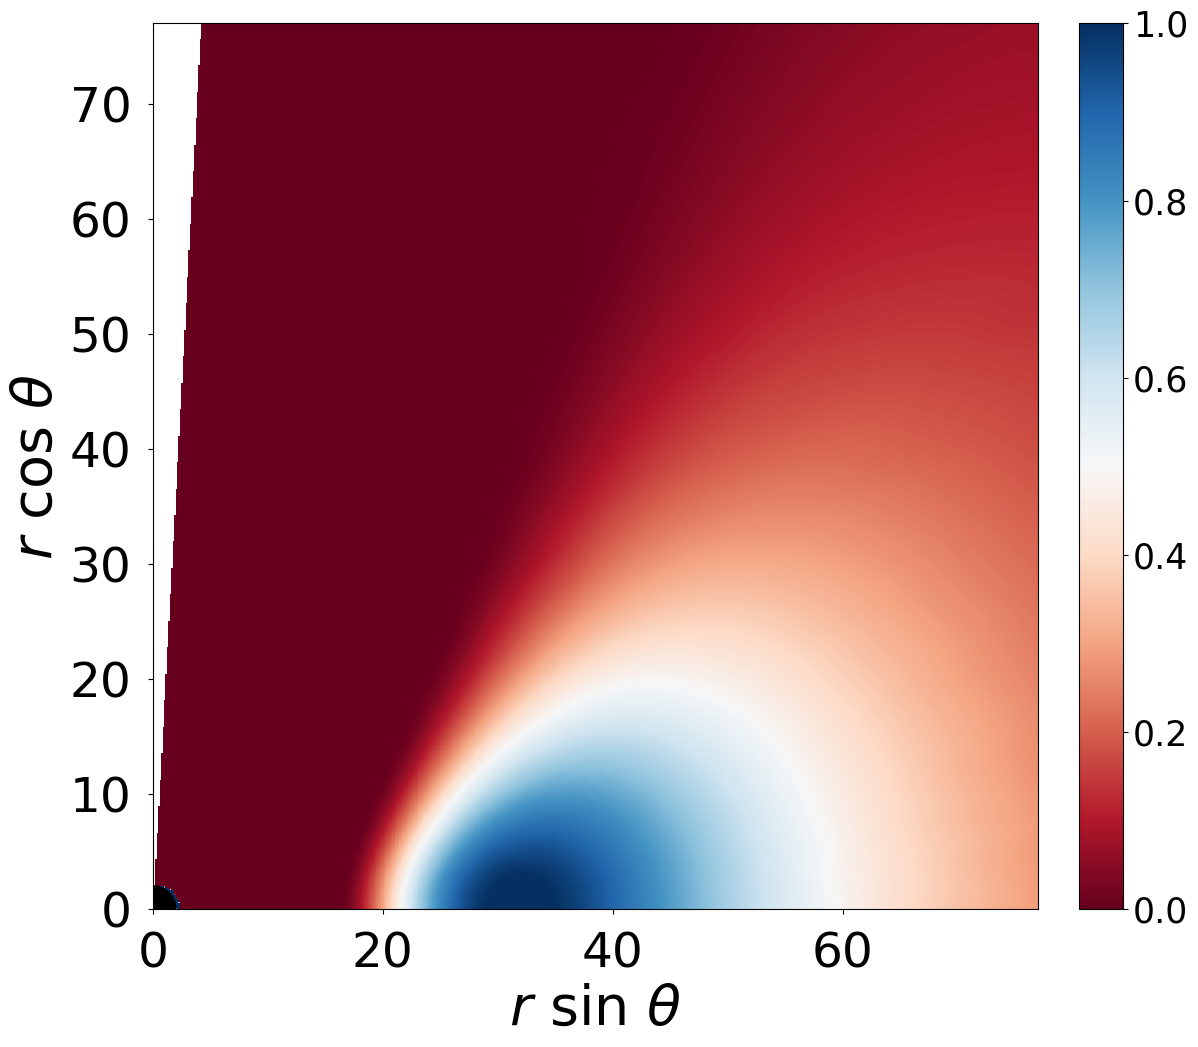

In [924]:
xArray = r_array*np.sin(theta_array)
yArray = r_array*np.cos(theta_array)

r_center = r_c
x_max = r_center * 2.5
y_max = x_max

heightArray = rho_array

numIndexes = 2000
xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

xi, yi = np.mgrid[np.min(xArray):np.max(xArray):2000j, np.min(yArray):np.max(yArray):2000j]

DEM = griddata((xArray, yArray), heightArray, (xi, yi), method="cubic")

z_min = 0
z_max = 1

xi = np.linspace(np.min(xArray), np.max(xArray),numIndexes)
yi = np.linspace(np.min(yArray), np.max(yArray),numIndexes)

plt.figure(figsize=(13,11.5))
plt.imshow(DEM.transpose(), cmap='RdBu', vmin=0, vmax=1,
        extent=[np.min(xArray), np.max(xArray), np.min(yArray), np.max(yArray)],
        interpolation='nearest', origin='lower')
cb = plt.colorbar(fraction=0.046, pad=0.04)
cb.ax.tick_params(labelsize = 25)

plb.ylim([0,x_max])
plb.xlim([0,x_max])
plt.tick_params(labelsize=35, pad = 12)
circle = plt.Circle((0., 0.), r_H, color='black')
fig = plt.gcf()
ax = fig.gca()
ax.add_artist(circle)
lx = plt.xlabel("$r$ sin $\\theta$", fontsize=40)
ly = plt.ylabel("$r$ cos $\\theta$", fontsize=40)
# plt.savefig(output_filename, dpi=900)
